# Import

## Library 

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, rand_score
# PCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing


# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

#Time
import time

##  Dataset

In [101]:
iris = pd.read_csv( 'iris.data' , names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] )

In [102]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
iris.shape

(150, 5)

In [104]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Pre-processing

## Define Feature and Target

In [105]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [106]:
y = iris[['Species']]
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Auto-Scaling

In [107]:
# Realizamos un autoscaling con los datos, para todas las features
scaler = StandardScaler().fit(x)
xscal = scaler.transform(x)

# Principal Component Analysis

<IPython.core.display.Javascript object>


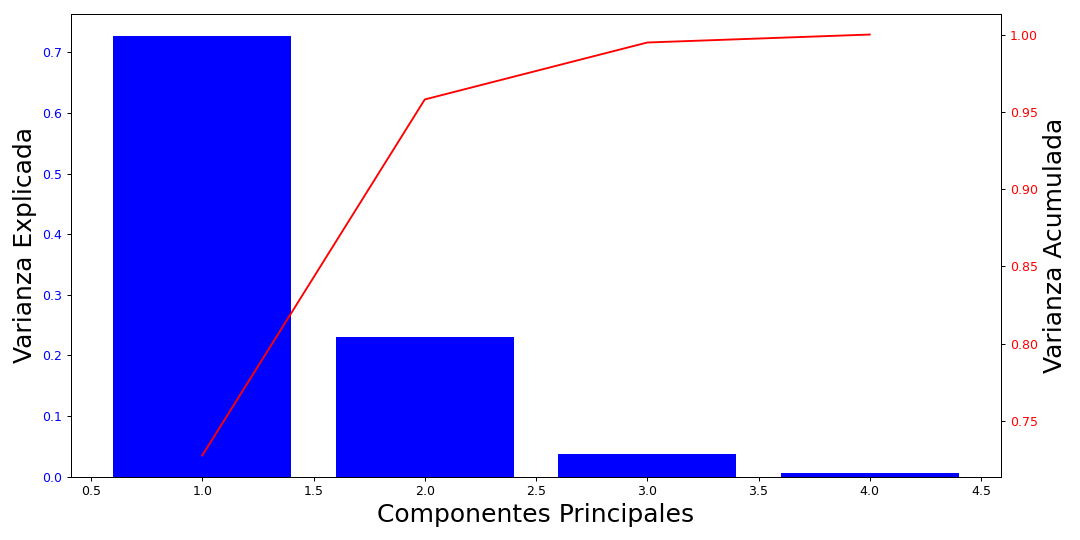

In [137]:
# Definimos la cantidad de componentes
n_comps = 4
components = range(1,n_comps + 1)
#Creamos el objeto PCA
pca = PCA(n_components=n_comps)

# Ajustamos
pca.fit(xscal)
# Transformamos
xpca = pca.transform(xscal)

# Porcentaje de la varianza explicada por cada Principal Component (PC)
eigenvalues = pca.explained_variance_ratio_

# Suma acumulada
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

# Graficamos
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20) 
ax2.plot(components, eigenvalues_acum, color='red') 
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Cluster analysis

## K - Means without PCA

<IPython.core.display.Javascript object>


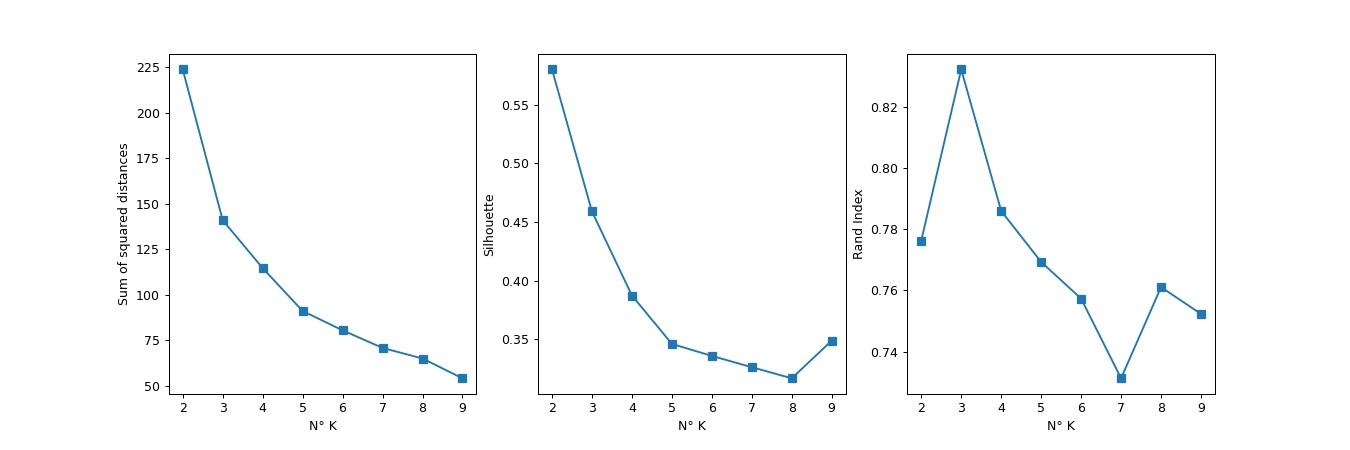

In [135]:
dist_cent = []
sil_list = []
rand_list = []
for k in range(2, 10):
    # Creamos el objecto de cluster y lo fiteamos en la misma linea utilizado xscal
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xscal)
    centers_i = kmeans.cluster_centers_ # Centroide de cada cluster
    labels_i = kmeans.labels_ # Labels de cada muestra    
    # Silhouttte Score
    sil_score_i = silhouette_score(xscal,labels_i)
    sil_list.append(sil_score_i)        
    # Rand_Index
    rand_index_i = rand_score(y,labels_i)
    rand_list.append(rand_index_i)
    dist_cent.append(kmeans.inertia_)    
# Plot de metricas
fig, axs = plt.subplots(1,3,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
axs[2].plot(range(2, 10), rand_list, marker='s');
axs[2].set_xlabel('N° K')
axs[2].set_ylabel('Rand Index')    
plt.show()


In [147]:
# Vamos a crear un dataframe para guardar los resultados
results_df = pd.DataFrame(columns=['Cluster','Rand_','Sil_'])

### Train KMeans with 2 clusters

In [148]:
kmeans2 = KMeans(n_clusters = 2, random_state = 10).fit(xscal)
# Silhouttte Score
sil_score = silhouette_score(xscal,kmeans2.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans2.labels_)

#Save outcome
results_df = results_df.append({'Cluster':'Kmeans2 without pca',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184


### Train KMeans with 3 clusters

In [149]:
kmeans3 = KMeans(n_clusters = 3, random_state = 10).fit(xscal)
# Silhouttte Score
sil_score = silhouette_score(xscal,kmeans3.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans3.labels_)

#Save outcome
results_df = results_df.append({'Cluster':'Kmeans3 without pca',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184
1,Kmeans3 without pca,0.819597,0.462149


## K - Means with  PCA

### 2 PC

In [150]:
reduced_dim = 2
xpca_rd = xpca[:,0:reduced_dim]

In [152]:
# Generamos el modelo PCA + K-means
kmeans_rd = KMeans(n_clusters=3,random_state=10).fit(xpca_rd)

In [153]:
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[-2.22730524,  0.3456925 ],
       [ 0.41801367, -0.94356957],
       [ 1.63471505,  0.48118669]])

#### Scatter plot con 2 PC:

<IPython.core.display.Javascript object>


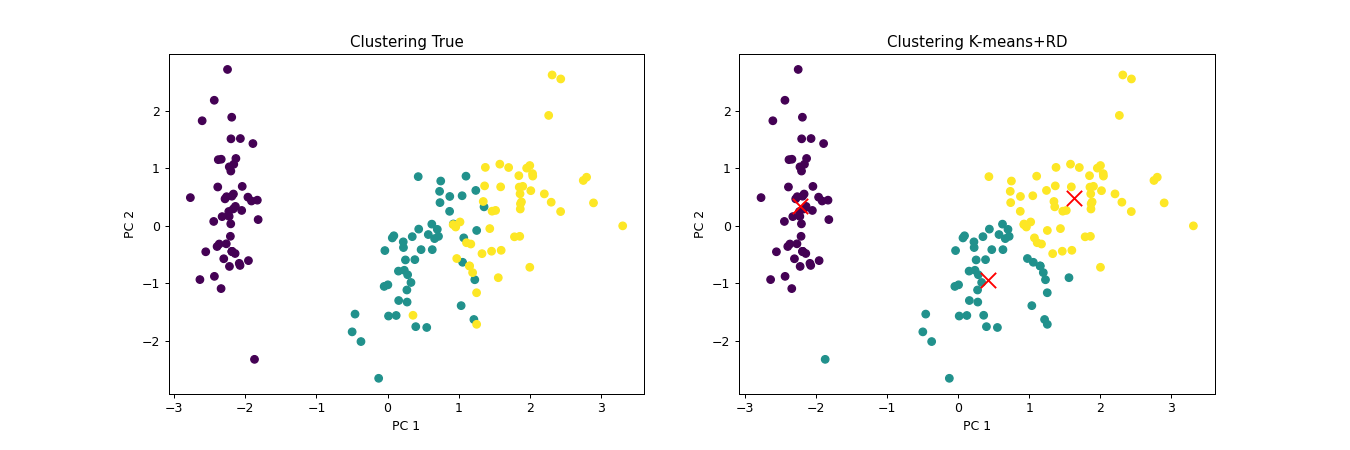

In [155]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
#Verdadero
axs[0].scatter(xpca[:,0],xpca[:,1],c=y)    
axs[0].set_xlabel('PC 1')
axs[0].set_ylabel('PC 2')
axs[0].set_title('Clustering True')
# PCA + K-Means
axs[1].scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
axs[1].scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
axs[1].set_xlabel('PC 1')
axs[1].set_ylabel('PC 2')
axs[1].set_title('Clustering K-means+RD')
plt.show()

#### Metrics

In [156]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans_rd.labels_)

#Guardamos los resultados
results_df = results_df.append({'Cluster':'2 PC + Kmeans',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184
1,Kmeans3 without pca,0.819597,0.462149
2,2 PC + Kmeans,0.843132,0.503895


### 3 PC

In [165]:
# Cantidad de PC quer queremos
reduced_dim = 3
xpca_rd = xpca[:,0:reduced_dim]
# Generamos el modelo PCA + K-means 
kmeans_rd = KMeans(n_clusters=3, 
                   random_state=10).fit(xpca_rd)
centers_rd = kmeans_rd.cluster_centers_
centers_rd


array([[-2.22019328,  0.29222482, -0.04395511],
       [ 1.70578273,  0.58803896, -0.02280596],
       [ 0.56023256, -0.8237906 ,  0.06331619]])

#### Scatter plot con 3 PC:

In [166]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xpca[:,0], xpca[:,1],xpca[:,3], c=kmeans_rd.labels_)
ax.scatter3D(centers_rd[:,0], centers_rd[:,1],centers_rd[:,2], marker="o", color='r',s=150)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

<IPython.core.display.Javascript object>

#### Metrics

In [158]:
# Silhouttte Score
sil_score = silhouette_score(xpca_rd,kmeans_rd.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans_rd.labels_)

#Guardamos los resultados
results_df = results_df.append({'Cluster':'3 PC + Kmeans',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184
1,Kmeans3 without pca,0.819597,0.462149
2,2 PC + Kmeans,0.843132,0.503895
3,3 PC + Kmeans,0.82783,0.464523


## Clustering Jerárquico

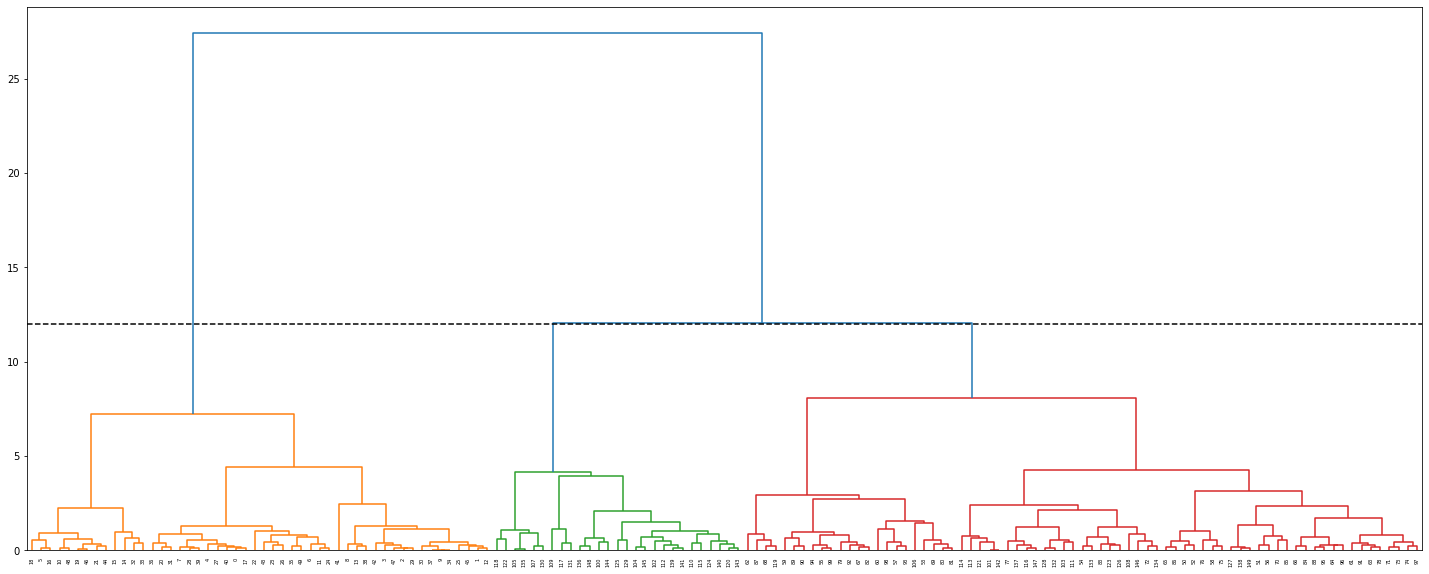

In [159]:
%matplotlib inline

# 3 PC
reduced_dim = 3
xpca_rd = xpca[:,0:reduced_dim]

# Definimos el linkage
Z = linkage(xpca_rd, method = 'ward',metric='euclidean')
# Threshold (Similaridad)
dist_cluster = 12
plt.figure(figsize=(25, 10))
dendrogram(Z,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

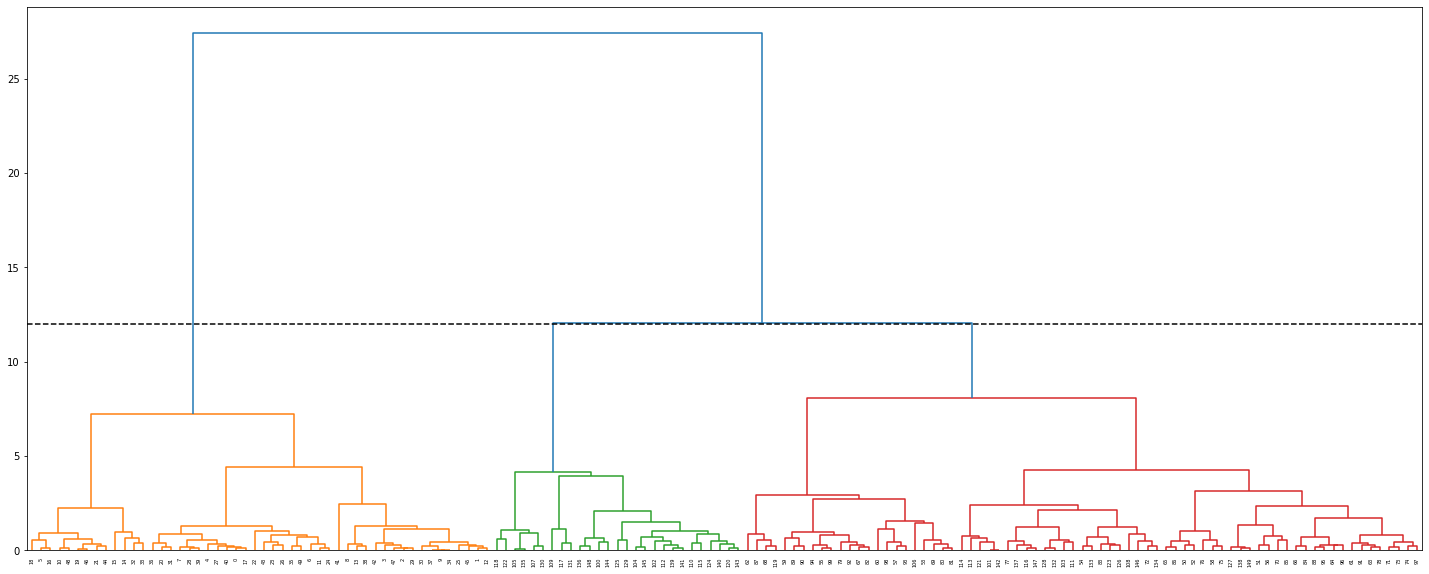

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0], dtype=int64)

In [160]:
%matplotlib inline

dist_cluster = 12
plt.figure(figsize=(25, 10))
dendrogram(Z,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold =dist_cluster,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(xpca_rd)

<IPython.core.display.Javascript object>


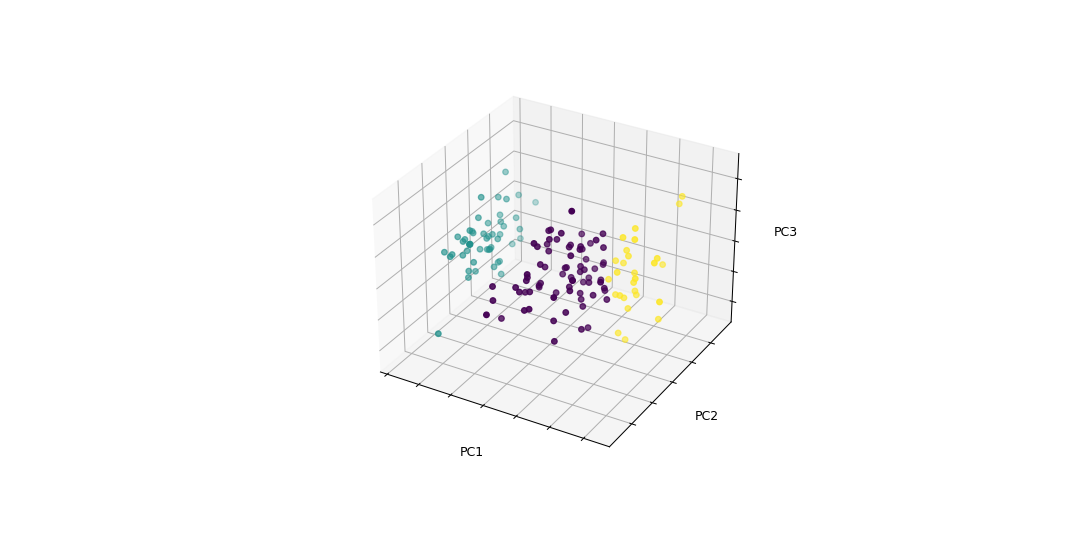

In [161]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xpca[:,0], xpca[:,1],xpca[:,3], c=cluster.labels_)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

### Metrics

In [162]:
sil_score = silhouette_score(xpca_rd,cluster.labels_)
# Rand_Index
rand_index = rand_score(y,cluster.labels_)

#Guardamos los resultados
results_df = results_df.append({'Cluster':str( reduced_dim) +  ' PC + Hierarchy ',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)


## Outcome

In [164]:
results_df.sort_values('Rand_',ascending=False)

,Cluster,Rand_,Sil_
2,2 PC + Kmeans,0.843132,0.503895
4,3 PC + Hierarchy,0.841521,0.463188
3,3 PC + Kmeans,0.82783,0.464523
1,Kmeans3 without pca,0.819597,0.462149
0,Kmeans2 without pca,0.776286,0.580184


# Classification Analysis

In [169]:
X = x

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [175]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.transform(X_test)

In [ ]:
pca = PCA().fit(X_train_scal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
get_ipython().run_line_magic('time', '')


# # In[22]:


# pca=PCA(0.95) #Se puede setear el parametro n_components para quedarse solo con n cantidad de variables
# X_train_scal = pca.fit_transform(X_train_scal)
# X_test_scal = pca.transform(X_test_scal)


# # In[23]:


# pca.n_components_


# # # Probamos algunos algoritmos aplicando PCA

# # 
# # ### LogisticRegression
# # 
# # 
# # 

# # In[24]:


# get_ipython().run_cell_magic('time', '', 'param_lr = {\'C\':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}\nlr = LogisticRegression()\nclf_lr = GridSearchCV(lr, param_grid = param_lr , scoring= \'roc_auc\', refit = True, cv = 5)\nclf_lr.fit(X_train_scal, y_train.ravel())')


# # In[25]:


# scores = clf_lr.cv_results_


# # In[26]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))


# # ## KNN

# # In[27]:


# get_ipython().run_cell_magic('time', '', "neigh = KNeighborsClassifier()\nparam_neigh = {'n_neighbors':[1, 10, 100, 200]}\nclf_n = GridSearchCV(neigh, param_grid = param_neigh , scoring= 'roc_auc', refit = True, cv = 5)\nclf_n.fit(X_train_scal, y_train.ravel())")


# # In[28]:


# scores = clf_n.cv_results_
# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_n.best_params_, clf_n.best_score_))


# # ## SVM

# # In[29]:


# param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}


# # In[30]:


# svc = svm.SVC()


# # In[31]:


# clf_svm = GridSearchCV(svc, param_grid = param_svc, scoring= 'roc_auc', refit = True, cv = 5)


# # In[32]:


# get_ipython().run_cell_magic('time', '', 'clf_svm.fit(X_train_scal, y_train.ravel())')


# # In[33]:


# scores = clf_svm.cv_results_


# # In[34]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_svm.best_params_, clf_svm.best_score_))


# # ## RandomForest

# # In[35]:


# rf= RandomForestClassifier(class_weight="balanced")


# # In[36]:


# param_trees = {'n_estimators': [50, 100, 200], 
#                'max_features': [30,50 ,80 ], 
#                'max_depth': [5, 20, 50, 70], 
#                'min_samples_leaf':[ 5, 8, 10]}


# # In[37]:


# get_ipython().run_cell_magic('time', '', "clf_rf = GridSearchCV(rf, param_grid = param_trees, scoring= 'roc_auc', refit = True, cv = 5)\nclf_rf.fit(X_train_scal, y_train.ravel())")


# # In[38]:


# scores = clf_rf.cv_results_


# # In[39]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_rf.best_params_, clf_rf.best_score_))


# # # Probamos los mismos algoritmos sin PCA

# # In[40]:


# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)


# # In[41]:


# X_train_scal2 = sc.fit_transform(X_train2)
# X_test_scal2 = sc.transform(X_test2)


# # ## LogisticRegression

# # In[42]:


# get_ipython().run_cell_magic('time', '', 'param_lr = {\'C\':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}\nlr = LogisticRegression()\nclf_lr2 = GridSearchCV(lr, param_grid = param_lr , scoring= \'roc_auc\', refit = True, cv = 5)\nclf_lr2.fit(X_train_scal2, y_train2.ravel())')


# # In[43]:


# scores2 = clf_lr2.cv_results_


# # In[44]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_lr2.best_params_, clf_lr2.best_score_))


# # ## KNN

# # In[45]:


# get_ipython().run_cell_magic('time', '', "neigh = KNeighborsClassifier()\nparam_neigh = {'n_neighbors':[1, 10, 100, 200]}\nclf_n2 = GridSearchCV(neigh, param_grid = param_neigh , scoring= 'roc_auc', refit = True, cv = 5)\nclf_n2.fit(X_train_scal2, y_train2.ravel())\n")


# # In[46]:


# scores2 = clf_n2.cv_results_


# # In[47]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_n2.best_params_, clf_n2.best_score_))


# # ## SVM

# # In[48]:


# param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
# svc = svm.SVC()


# # In[49]:


# get_ipython().run_cell_magic('time', '', "clf_svm2 = GridSearchCV(svc, param_grid = param_svc, scoring= 'roc_auc', refit = True, cv = 5)\nclf_svm2.fit(X_train_scal2, y_train2.ravel())")


# # In[50]:


# scores2 = clf_svm2.cv_results_


# # In[51]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_svm2.best_params_, clf_svm2.best_score_))


# # ## RandomForest

# # In[52]:


# rf= RandomForestClassifier(class_weight="balanced")
# param_trees = {'n_estimators': [50, 100, 200], 
#                'max_features': [30, 50, 80], 
#                'max_depth': [5, 20, 50, 70], 
#                'min_samples_leaf':[ 5, 8, 10]}


# # In[53]:


# get_ipython().run_cell_magic('time', '', "clf_rf2 = GridSearchCV(rf, param_grid = param_trees, scoring= 'roc_auc', refit = True, cv = 5)\nclf_rf2.fit(X_train_scal2, y_train2.ravel())")


# # In[54]:


# scores2 = clf_rf2.cv_results_


# # In[55]:


# print("Los mejores paramentros son %s con un score de %0.2f" % (clf_rf2.best_params_, clf_rf2.best_score_))


# # In[ ]:





# # 
